# Why divide by (n-1) when computing sample variance

<br>
The reason that we take *samples* from a population is to find out the parameters of that *population*. If the size of the population is N then, among other statistics, the mean $\mu$ and the variance $\sigma^2$ are defined below assuming P denotes the population:
<br>

\begin{equation}
\begin{aligned}
    \text{Mean}(P) &= \mu = \frac{1}{N} \sum_{i=1}^{N} p_i \\
    \text{Var}(P) &= \sigma^2 = \frac{1}{N} \sum_{i=1}^{N} (p_i - \mu)^2 \\
\end{aligned}
\end{equation}
<br>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

np.random.seed()
N = int(1e5)  
P = pd.Series(np.random.randint(1, 11, N))
print("Population mean is {}".format(P.mean()))
print("Population variance is {}".format(P.var(ddof=0)))
#If you want to verify, here are the mean and variance calculated manually
print("Population mean (calculated manually) is {}".format(P.sum()/N))
print("Population variance (calculated manually) is {}".format(((P.values-P.mean())**2).sum()/N))

Population mean is 5.49953
Population variance is 8.226439779099998
Population mean (calculated manually) is 5.49953
Population variance (calculated manually) is 8.226439779099998


And if you take n *samples* from population P the sample statistics are defined below assuming S denotes the samples:
<br>

\begin{equation}
\begin{aligned}
    \text{Mean}(S) &= \bar{s} = \frac{1}{n} \sum_{i=1}^{n} s_i \\
    \text{Var}(S) &= s^2 = \frac{1}{n - 1} \sum_{i=1}^{n} (s_i - \bar{s})^2 \\
\end{aligned}
\end{equation}
<br>

Why is it that we must divide by $(n-1)$ instead of $n$ when calculating the sample variance? The reason this is the case is that otherwise we would be computing a *biased* estimate of the variance. The simulation below will show this bias in action. We are taking 1K samples of size 30 from the population and graphing the biased as well as the unbiased variance estimates vs. the true population variance. Note how the unbiased estimate is the closest estimate.

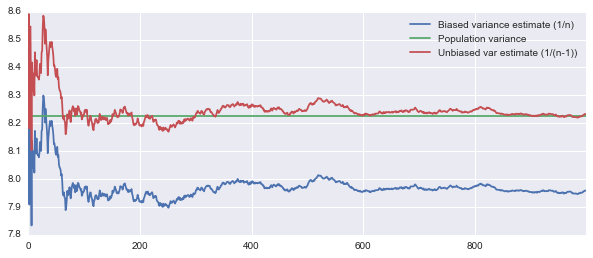

In [2]:
S = {}                 # this is our sample
n = 30                # this is our sample size
number_samples = 1000  # to calculate a long run average we will take 1000 samples
for i in range(number_samples):
    S[i] = P.sample(n).reset_index(drop=True)
S = pd.DataFrame(S)
#S.T.tail()
results = pd.DataFrame({'Population variance': pd.Series(P.var(ddof=0), index=S.columns),
                   'Biased variance estimate (1/n)': S.var(ddof=0).expanding(min_periods=1).mean(),
                   'Unbiased var estimate (1/(n-1))': S.var(ddof=1).expanding(min_periods=1).mean(),
                   })
results.plot(figsize=(10,4))

### So what is the Math behind this?

Below is the mathematical proof to show that dividing by $(n-1)$ provides the unbiased estimate of the variance. Basically we need to show that expected value of the sample variance is indeed the population variance, i.e. $E(s^2) = \sigma^2$:
\begin{equation}
    E(s^2) = E\left(\frac{1}{n - 1} \sum_{i=1}^{n} (s_i - \bar{s})^2\right) = \sigma^2
\end{equation}
<br>

Using the various properties of variance and expectation that follow carry on with the derivation. What I consider important is the term in red below:<br>

\begin{equation}
\left\{
\begin{aligned}
    & Var(aX) = a^2 Var(X), \text{for any X} \\
    & Var(X + Y) =  Var(X) + Var(Y), \text{if X and Y are independent} \\
    & Var(X) = E[(X - E(X))^2] = E(X^2 - \color{red}{2XE(X)} + E(X)^2) = E(X^2) - 2\color{red}{E[XE(X)]} + E[E(X)^2)] \\
    & = E(X^2) - 2\color{red}{E(X)E(X)} + E(X)^2 = E(X^2) - E(X)^2\\
    & \therefore E(X^2) = \text{Var}(X) + E(X)^2
\end{aligned}
\right.
\end{equation}
<br>

\begin{aligned}
    E(s^2) = E\left(\frac{1}{n - 1} \sum_{i=1}^{n} (s_i - \bar{s})^2\right) = & \frac{1}{n - 1} E \left( \sum_{i=1}^{n} (s_i^2 - \color{red}{2s_i\bar{s} + \bar{s}^2}) \right) \\
    = & \ \frac{1}{n - 1} E \left( \sum_{i=1}^{n} s_i^2 - 2n\bar{s}^2 + n\bar{s}^2 \right) \\
    = & \ \frac{1}{n - 1} E \left( \sum_{i=1}^{n} s_i^2 - n\bar{s}^2 \right) \\
    = & \ \frac{1}{n - 1} \left[ E \left( \sum_{i=1}^{n} s_i^2 \right) - E \left( n\bar{s}^2 \right) \right] \\
    = & \ \frac{1}{n - 1} \left[ \sum_{j=1}^{n} E \left( s_i^2 \right) - n E \left( \bar{s}^2 \right) \right] \\
\end{aligned}
<br>

Both the first and second terms may be simplified as follows:<br>

\begin{aligned}
    \sum_{i=1}^{n} E \left( s_i^2 \right) = & \sum_{i=1}^{n} \left( Var(s_i) + E(s_i)^2 \right) \\
    = & \sum_{i=1}^{n} \left( \sigma^2 + \mu ^2 \right) \\
    = & \ n \sigma^2 + n \mu ^2 \\
\end{aligned}
<br>

\begin{aligned}
    E(\bar{s}^2) = & \ Var(\bar{s}) + E(\bar{s})^2 \\
    = & Var(\frac{1}{n} \sum_{i=1}^{n} s_i) + \mu ^2 \\
    = & \frac{1}{n^2} Var(\sum_{i=1}^{n} s_i) + \mu ^2 \\
    = & \frac{1}{n^2} \sum_{i=1}^{n} Var(s_i) + \mu ^2, \text{ since all } s_i\text{'s are independent} \\
    = & \frac{1}{n^2} n\sigma^2 + \mu ^2 \\
    = & \frac{1}{n} \sigma^2 + \mu ^2 \\
\end{aligned}
<br>

Putting it all togeher:
\begin{aligned}
    E(s^2) = & \ \frac{1}{n-1} \left[ \sum_{i=1}^{n} E \left( s_i^2 \right) - n E \left(\bar{s}^2 \right) \right] \\
    = & \ \frac{1}{n-1} \left[n \sigma^2 + n \mu ^2 - n \left( \frac{1}{n} \sigma^2 + \mu ^2 \right) \right] \\
    = & \ \frac{1}{n-1} \left[n \sigma^2 + n \mu ^2 - \sigma^2 - n \mu ^2 \right] \\
    = & \ \frac{1}{n-1} \left[(n - 1)\sigma^2 \right] \\
    = & \ \sigma^2 \\
\end{aligned}
<br>

So there you have it. The variance estimate using $(n-1)$ provides or is equal to the population variance.